## 4.5.2 Comparasión Empirica

There were 20 training observations in each of two classes. The
observations within each class were uncorrelated random normal variables
with a different mean in each class. The left-hand panel of Figure 4.11 shows
that LDA performed well in this setting, as one would expect since this is
the model assumed by LDA. Logistic regression also performed quite well,
since it assumes a linear decision boundary. KNN performed poorly because it paid a price in terms of variance that was not offset by a reduction in bias.
QDA also performed worse than LDA, since it fit a more flexible classifier
than necessary. The performance of naive Bayes was slightly better than
QDA, because the naive Bayes assumption of independent predictors is
correct.

<img src="images/scene1.png" style="width:350px" />

Details are as in Scenario 1, except that within each class, the
two predictors had a correlation of −0.5. The center panel of Figure 4.11
indicates that the performance of most methods is similar to the previous scenario. The notable exception is naive Bayes, which performs very
poorly here, since the naive Bayes assumption of independent predictors is
violated.

<img src="images/scene2.png" style="width:350px" />

As in the previous scenario, there is substantial negative correlation between the predictors within each class. However, this time we
generated X1 and X2 from the t-distribution, with 50 observations per class. t- The t-distribution has a similar shape to the normal distribution, but it distribution
has a tendency to yield more extreme points—that is, more points that are
far from the mean. In this setting, the decision boundary was still linear,
and so fit into the logistic regression framework. The set-up violated the
assumptions of LDA, since the observations were not drawn from a normal
distribution. The right-hand panel of Figure 4.11 shows that logistic regression outperformed LDA, though both methods were superior to the other
approaches. In particular, the QDA results deteriorated considerably as a
consequence of non-normality. Naive Bayes performed very poorly because
the independence assumption is violated.

<img src="images/scene3.png" style="width:350px" />

The data were generated from a normal distribution, with a
correlation of 0.5 between the predictors in the first class, and correlation of
−0.5 between the predictors in the second class. This setup corresponded to
the QDA assumption, and resulted in quadratic decision boundaries. The
left-hand panel of Figure 4.12 shows that QDA outperformed all of the
other approaches. The naive Bayes assumption of independent predictors
is violated, so naive Bayes performs poorly.

<img src="images/scene4.png" style="width:350px" />

The data were generated from a normal distribution with uncorrelated predictors. Then the responses were sampled from the logistic
function applied to a complicated non-linear function of the predictors. The
center panel of Figure 4.12 shows that both QDA and naive Bayes gave
slightly better results than the linear methods, while the much more flexible KNN-CV method gave the best results. But KNN with K = 1 gave the
worst results out of all methods. This highlights the fact that even when the
data exhibits a complex non-linear relationship, a non-parametric method
such as KNN can still give poor results if the level of smoothness is not
chosen correctly.

<img src="images/scene5.png" style="width:350px" />

The observations were generated from a normal distribution
with a different diagonal covariance matrix for each class. However, the
sample size was very small: just n = 6 in each class. Naive Bayes performed
very well, because its assumptions are met. LDA and logistic regression
performed poorly because the true decision boundary is non-linear, due to
the unequal covariance matrices. QDA performed a bit worse than naive
Bayes, because given the very small sample size, the former incurred too
much variance in estimating the correlation between the predictors within
each class. KNN’s performance also suffered due to the very small sample
size.

<img src="images/scene6.png" style="width:350px" />

# Ejemplo

In [8]:
df <- read.csv("House_Price.csv")
df2 <- subset(df,select=-c(airport,waterbody,bus_ter))
summary(df2)

     price         crime_rate         resid_area       air_qual     
 Min.   : 5.00   Min.   : 0.00632   Min.   :30.46   Min.   :0.3850  
 1st Qu.:17.02   1st Qu.: 0.08205   1st Qu.:35.19   1st Qu.:0.4490  
 Median :21.20   Median : 0.25651   Median :39.69   Median :0.5380  
 Mean   :22.53   Mean   : 3.61352   Mean   :41.14   Mean   :0.5547  
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.:48.10   3rd Qu.:0.6240  
 Max.   :50.00   Max.   :88.97620   Max.   :57.74   Max.   :0.8710  
                                                                    
    room_num          age             dist1            dist2       
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 0.920  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.270   1st Qu.: 1.940  
 Median :6.208   Median : 77.50   Median : 3.385   Median : 3.010  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.972   Mean   : 3.629  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.367   3rd Qu.: 4.992  
 Max.   :8.780   Max.   :100.00   Max.  

## Regression logistica

In [12]:
glm.fit <- glm(Sold~., data=df2, family=binomial)
summary(glm.fit)


Call:
glm(formula = Sold ~ ., family = binomial, data = df2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0665  -0.9528  -0.3052   0.9608   1.9857  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.882631   2.713789  -1.062 0.288138    
price       -0.281939   0.034545  -8.162 3.31e-16 ***
crime_rate  -0.010015   0.016407  -0.610 0.541595    
resid_area   0.017480   0.026882   0.650 0.515542    
air_qual    -7.276704   2.735801  -2.660 0.007819 ** 
room_num     1.137622   0.294636   3.861 0.000113 ***
age         -0.004251   0.006691  -0.635 0.525207    
dist1        1.247147   0.865128   1.442 0.149422    
dist2       -1.414165   0.920892  -1.536 0.124625    
dist3        0.713404   0.913104   0.781 0.434629    
dist4       -0.982326   0.497270  -1.975 0.048218 *  
teachers     0.310093   0.064566   4.803 1.57e-06 ***
poor_prop   -0.207516   0.034533  -6.009 1.86e-09 ***
n_hos_beds   0.178941   0.071975   2.486 0.012913 *  

In [16]:
df3 <- subset(df2, select=c(price,air_qual,room_num,teachers,poor_prop,Sold))

In [18]:
glm.fit <- glm(Sold~., data=df3, family=binomial)

In [20]:
glm.pred_prob <- predict(glm.fit,type = "response")

In [98]:
glm.pred <- rep("No",length(df3$Sold))
glm.pred[glm.pred_prob > 0.6] <- "Yes"

In [99]:
table(glm.pred,df3$Sold)

        
glm.pred   0   1
     No  236 141
     Yes  40  89

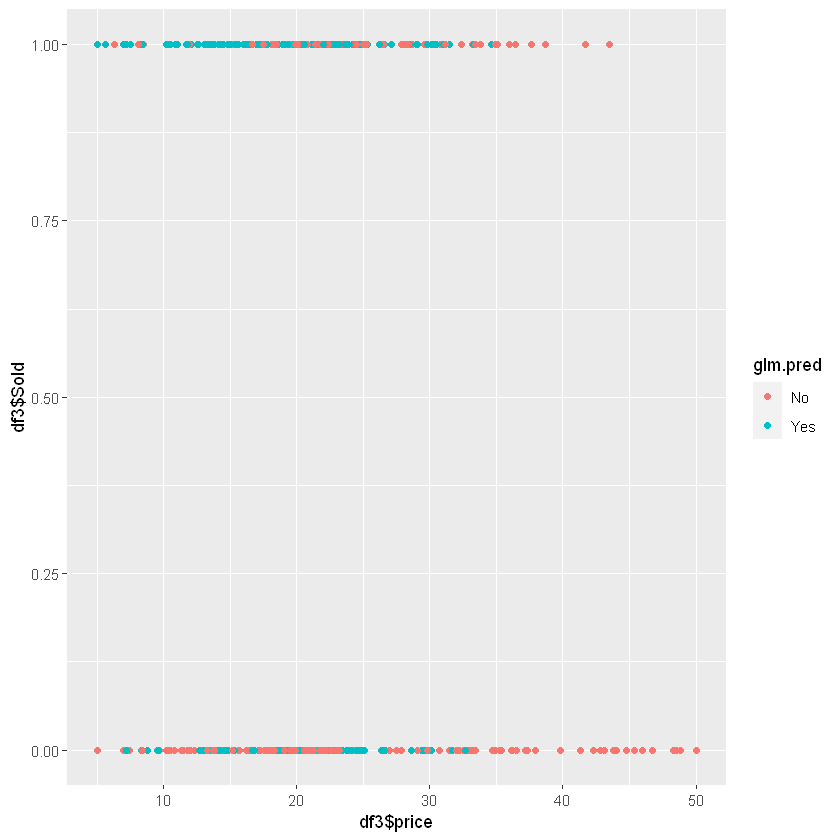

In [33]:
library("ggplot2")
ggplot(df,aes(x=df3$price,y=df3$Sold,col=glm.pred))+geom_point()

In [35]:
cor(df3)

,price,air_qual,room_num,teachers,poor_prop,Sold
price,1.0000000,-0.429300219,0.69630379,0.5056546,-0.74083599,-0.154698364
air_qual,-0.4293002,1.000000000,-0.30218819,-0.1889327,0.59087892,-0.004017022
room_num,0.6963038,-0.302188188,1.00000000,0.3555015,-0.61380827,0.027147654
teachers,0.5056546,-0.188932677,0.35550149,1.0000000,-0.37404432,0.042524703
poor_prop,-0.7408360,0.590878921,-0.61380827,-0.3740443,1.00000000,-0.082776328
Sold,-0.1546984,-0.004017022,0.02714765,0.0425247,-0.08277633,1.000000000


## LDA

In [39]:
library("MASS")
lda.fit <- lda(Sold~ ., data=df3)
lda.fit

Call:
lda(Sold ~ ., data = df3)

Prior probabilities of groups:
        0         1 
0.5454545 0.4545455 

Group means:
     price  air_qual room_num teachers poor_prop
0 23.82428 0.5551196 6.267239 21.46051  13.19214
1 20.97435 0.5541857 6.305509 21.64522  12.00617

Coefficients of linear discriminants:
                 LD1
price     -0.2008033
air_qual   1.2835689
room_num   0.7159292
teachers   0.2071702
poor_prop -0.1694082

In [100]:
lda.pred <- predict(lda.fit, type="response")
names(lda.pred)
lda.class <- lda.pred$class
table(lda.class,df3$Sold)

[1] "class"     "posterior" "x"

         
lda.class   0   1
        0 187  81
        1  89 149

## QDA

In [44]:
qda.fit <- qda(Sold~ ., data=df3)
qda.fit

Call:
qda(Sold ~ ., data = df3)

Prior probabilities of groups:
        0         1 
0.5454545 0.4545455 

Group means:
     price  air_qual room_num teachers poor_prop
0 23.82428 0.5551196 6.267239 21.46051  13.19214
1 20.97435 0.5541857 6.305509 21.64522  12.00617

In [63]:
qda.pred <- predict(qda.fit, type="response")
qda.class <- qda.pred$class
table(qda.class,df3$Sold)

         
qda.class   0   1
        0 125  36
        1 151 194

## Naive Bayess

In [47]:
library("e1071")
nb.fit <- naiveBayes(Sold~ ., data=df3)
nb.fit


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.5454545 0.4545455 

Conditional probabilities:
   price
Y       [,1]      [,2]
  0 23.82428 10.553842
  1 20.97435  6.908099

   air_qual
Y        [,1]      [,2]
  0 0.5551196 0.1189847
  1 0.5541857 0.1122919

   room_num
Y       [,1]      [,2]
  0 6.267239 0.8121322
  1 6.305509 0.5438879

   teachers
Y       [,1]     [,2]
  0 21.46051 2.137645
  1 21.64522 2.197686

   poor_prop
Y       [,1]     [,2]
  0 13.19214 8.042625
  1 12.00617 5.831644


In [55]:
nb.class <- predict(nb.fit,type="class",newdata=df3)
table(nb.class,df3$Sold)

        
nb.class   0   1
       0 121  51
       1 155 179

# KNN

In [101]:
library("class")
library("caTools")
split <- sample.split(df3, SplitRatio=0.8)
train_set <- subset(df3, split == TRUE)
test_set <- subset(df3, split == FALSE)
trainX = train_set[,-6]
testX = test_set[,-6]
trainY = train_set$Sold
testY = test_set$Sold
knn.pred <- knn(trainX, testX, trainY, k=1)
table(knn.pred, testY)
mean(knn.pred==testY)

        testY
knn.pred  0  1
       0 58 35
       1 34 42

[1] 0.591716

In [148]:
knn.pred <- knn(trainX, testX, trainY, k=2)
table(knn.pred, testY)
mean(knn.pred==testY)

        testY
knn.pred  0  1
       0 60 32
       1 32 45

[1] 0.6213018